In [ ]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
import os

if not os.path.isdir("HappyML"):
  os.system("git clone https://github.com/cnchi/HappyML.git")
import HappyML.model_drawer as md

In [ ]:
import HappyML.preprocessor as pp

In [ ]:
!pip install statsmodels

# 資料前處理與讀入(Q1)

In [ ]:
# 資料讀入

car_data = pd.read_csv("ToyotaUsedCars.csv")
print(car_data)

               model  year transmission  mileage fuelType  tax   mpg  \
0               GT86  2016       Manual    24089   Petrol  265  36.2   
1               GT86  2017       Manual    18615   Petrol  145  36.2   
2               GT86  2015       Manual    27469   Petrol  265  36.2   
3               GT86  2017       Manual    14736   Petrol  150  36.2   
4               GT86  2017       Manual    36284   Petrol  145  36.2   
...              ...   ...          ...      ...      ...  ...   ...   
6733              IQ  2011    Automatic    30000   Petrol   20  58.9   
6734   Urban Cruiser  2011       Manual    36154   Petrol  125  50.4   
6735   Urban Cruiser  2012       Manual    46000   Diesel  125  57.6   
6736   Urban Cruiser  2011       Manual    60700   Petrol  125  50.4   
6737   Urban Cruiser  2011       Manual    45128   Petrol  125  50.4   

      engineSize  price  
0            2.0  16000  
1            2.0  15995  
2            2.0  13998  
3            2.0  18998  
4    

In [ ]:
#切出應變數
X = car_data.iloc[:,:-1].values
Y = car_data.iloc[:,car_data.shape[1]-1].values
print("自變數X:\n",X)
print("應變數Y:\n",Y)

自變數X:
 [[' GT86' 2016 'Manual' ... 265 36.2 2.0]
 [' GT86' 2017 'Manual' ... 145 36.2 2.0]
 [' GT86' 2015 'Manual' ... 265 36.2 2.0]
 ...
 [' Urban Cruiser' 2012 'Manual' ... 125 57.6 1.4]
 [' Urban Cruiser' 2011 'Manual' ... 125 50.4 1.3]
 [' Urban Cruiser' 2011 'Manual' ... 125 50.4 1.3]]
應變數Y:
 [16000 15995 13998 ...  4995  3995  4495]


In [ ]:
# 先判斷是否有資料缺失發生
car_data.isnull().any()

,0
model,False
year,False
transmission,False
mileage,False
fuelType,False
tax,False
mpg,False
engineSize,False
price,False


根據結果無資料缺失，故不進行處理

In [ ]:
#資料數位化,將此步驟寫成函數形式
def X_encoder(X,rows): # rows代表要進行數位化的欄位，(0,2,4)代表第0,第2,第4列需要數位化
  for row in rows:
    ary_dum = pd.get_dummies(X[:, row]).values.astype("float64")
    X = np.concatenate((X,ary_dum), axis=1)

  i = 0
  for row in rows:
    row -= i
    X = np.delete(X, row, axis=1)
    i += 1

  return X

In [ ]:
X = X_encoder(X,(0,2,4))
print(X)




[[2016 24089 265 ... 0.0 0.0 1.0]
 [2017 18615 145 ... 0.0 0.0 1.0]
 [2015 27469 265 ... 0.0 0.0 1.0]
 ...
 [2012 46000 125 ... 0.0 0.0 0.0]
 [2011 60700 125 ... 0.0 0.0 1.0]
 [2011 45128 125 ... 0.0 0.0 1.0]]


應變數為數值資料，故不進行處理

In [ ]:
# 切分訓練集&測試集
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [ ]:
# 特徵縮放
sc_X = StandardScaler().fit(X_train)
X_train = sc_X.transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
# 印出前處理結果
print("自變數訓練集:")
print(X_train,"\n")
print("應變數訓練集:")
print(Y_train,"\n")
print("自變數測試集:")
print(X_test,"\n")
print("應變數測試集:")
print(Y_test,"\n")

自變數訓練集:
[[-0.81548946 -0.19993468 -1.28400007 ... -0.66595213 -0.12196224
   0.81051346]
 [ 1.03524241 -1.14650953  0.67778175 ... -0.66595213 -0.12196224
   0.81051346]
 [-1.27817243  2.03265222 -0.87811418 ... -0.66595213 -0.12196224
   0.81051346]
 ...
 [ 1.03524241 -1.11681806  0.67778175 ... -0.66595213 -0.12196224
   0.81051346]
 [-3.59158726  2.02363874 -0.87811418 ... -0.66595213 -0.12196224
   0.81051346]
 [-0.35280649 -0.24272222 -1.28400007 ...  1.50160944 -0.12196224
  -1.23378581]] 

應變數訓練集:
[ 6995 13491  4850 ... 11990  3995 11995] 

自變數測試集:
[[-0.35280649  0.61673997 -1.28400007 ...  1.50160944 -0.12196224
  -1.23378581]
 [ 1.03524241 -1.13447388  0.67778175 ... -0.66595213 -0.12196224
   0.81051346]
 [ 1.03524241 -1.01862411  0.67778175 ... -0.66595213 -0.12196224
   0.81051346]
 ...
 [ 0.10987647 -0.09007622  0.67778175 ... -0.66595213 -0.12196224
   0.81051346]
 [ 1.03524241 -0.74625784  0.54248645 ...  1.50160944 -0.12196224
  -1.23378581]
 [-0.35280649 -0.07634391 -1

# 神經網路模型訓練(Q2)

In [ ]:
# Add Layers with .add() function
model = Sequential()

# Using Formula #2, Instance=5390, alpha=2 features=31
model.add(Input(shape=(X_train.shape[1], )))
model.add(Dense(units=84, kernel_initializer="glorot_normal", activation="relu"))
model.add(Dense(units=31, kernel_initializer="glorot_normal", activation="relu"))
model.add(Dense(units=1, kernel_initializer="glorot_normal", activation="linear"))

In [ ]:
# Compile the whole Neural Networks
model.compile(optimizer="adam", loss="mse", metrics=["mse"])

In [ ]:
# Training (Fit)
epochs_metrics = model.fit(x=X_train, y=Y_train, validation_split=0.2, batch_size=5, epochs=50)

Epoch 1/50
863/863 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 835633472.0000 - mse: 835633472.0000 - val_loss: 492359104.0000 - val_mse: 492359104.0000
Epoch 2/50
863/863 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 295020032.0000 - mse: 295020032.0000 - val_loss: 108726784.0000 - val_mse: 108726784.0000
Epoch 3/50
863/863 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 84557352.0000 - mse: 84557352.0000 - val_loss: 66892056.0000 - val_mse: 66892056.0000
Epoch 4/50
863/863 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 59103484.0000 - mse: 59103484.0000 - val_loss: 45307248.0000 - val_mse: 45307248.0000
Epoch 5/50
863/863 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 38762600.0000 - mse: 38762600.0000 - val_loss: 30654958.0000 - val_mse: 30654958.0000
Epoch 6/50
863/863 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 27430498.0000 - mse: 27430498.0000 - val_loss: 21875286.0000 - val_mse: 21875286.0000
Epoch 7/50
863/863 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 24203992.0000 - mse: 24203992.0000 - val_loss: 15763273.

# 驗證是否過度擬合(Q3)

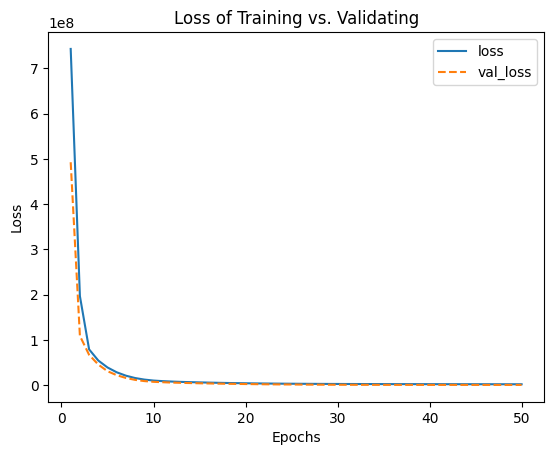

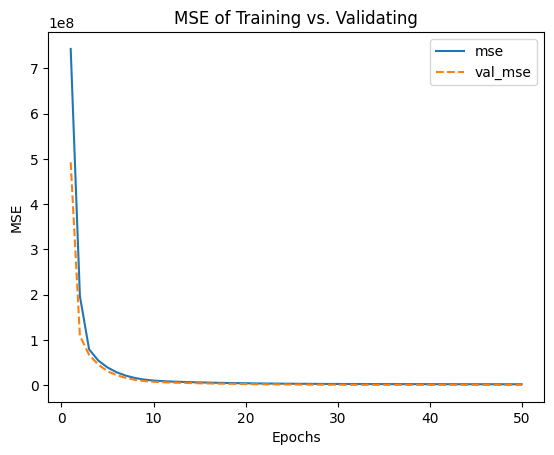

In [ ]:
md.epochs_metrics_plot(epochs_metrics.history, keys=("loss", "val_loss"), title="Loss of Training vs. Validating", xyLabel=("Epochs", "Loss"))
md.epochs_metrics_plot(epochs_metrics.history, keys=("mse", "val_mse"), title="MSE of Training vs. Validating", xyLabel=("Epochs", "MSE"))

結論：模型表現得很漂亮，測試集與驗證集大致無異，並epoch在10之後loss和mse就無明顯變化，故將epoch設為12

# 修正模型epochs(Q4)

In [ ]:
model = Sequential()

# Using Formula #2, Instance=5390, alpha=2 features=31
model.add(Input(shape=(X_train.shape[1], )))
model.add(Dense(units=84, kernel_initializer="glorot_normal", activation="relu"))
model.add(Dense(units=31, kernel_initializer="glorot_normal", activation="relu"))
model.add(Dense(units=1, kernel_initializer="glorot_normal", activation="linear"))

In [ ]:
model.compile(optimizer="adam", loss="mse", metrics=["mse"])

In [ ]:
epochs_metrics = model.fit(x=X_train, y=Y_train, validation_split=0.2, batch_size=5, epochs=12)

Epoch 1/12
863/863 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 178554544.0000 - mse: 178554544.0000 - val_loss: 37718052.0000 - val_mse: 37718052.0000
Epoch 2/12
863/863 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 18807396.0000 - mse: 18807396.0000 - val_loss: 10252451.0000 - val_mse: 10252451.0000
Epoch 3/12
863/863 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 6790500.5000 - mse: 6790500.5000 - val_loss: 7100811.0000 - val_mse: 7100811.0000
Epoch 4/12
863/863 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 5305557.5000 - mse: 5305557.5000 - val_loss: 5501520.5000 - val_mse: 5501520.5000
Epoch 5/12
863/863 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 4662723.5000 - mse: 4662723.5000 - val_loss: 4516764.0000 - val_mse: 4516764.0000
Epoch 6/12
863/863 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 3796975.2500 - mse: 3796975.2500 - val_loss: 3904410.7500 - val_mse: 3904410.7500
Epoch 7/12
863/863 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 3449796.0000 - mse: 3449796.0000 - val_loss: 3517003.5000 - val_mse: 3517003.5

# 比較真實值與預測值(Q5)


In [ ]:
X_test = pd.DataFrame(X_test)
Y_test = pd.DataFrame(Y_test)

Y_pred = pd.DataFrame(model.predict(x=X_test), index=Y_test.index, columns=Y_test.columns)

# 显示预测结果
df = pd.concat([Y_test, Y_pred], axis=1)
print(df.head(30))

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
        0             0
0   11295  11125.390625
1   18995  18485.945312
2    8950   9958.602539
3    9995  10300.931641
4   15990  18278.568359
5    9991   9809.716797
6    9990  10423.900391
7    8495   8342.759766
8   10995  13098.504883
9   20795  21054.826172
10  13995  13922.831055
11  19000  21038.265625
12   9750  10148.757812
13  33892  28009.751953
14  20450  21991.523438
15   6298   5987.682129
16  10995  11507.388672
17  48995  40678.687500
18  11975  11750.503906
19   7950   6814.761719
20  12675  12671.477539
21   9550  10188.870117
22   9698  10055.284180
23  27990  27110.626953
24  20500  25956.052734
25   5698   6030.428711
26  10695  10716.959961
27  10890  10322.791992
28  11000  10970.633789
29  11991  12753.945312


# 印出模型MSE(Q6)

In [ ]:
print(Y_test.shape)
print(X_test.shape)


(1348, 1)
(1348, 31)


In [ ]:
X_test = X_test.astype("float64")
Y_test = Y_test.astype("float64")

test_loss, test_mse = model.evaluate(X_test, Y_test)
print("Loss of Testing Set:", test_loss)
print("MSE of Testing Set:", test_mse)
print("RMSE of Testing Set:", (test_mse)** 0.5)

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2470344.2500 - mse: 2470344.2500
Loss of Testing Set: 2742161.0
MSE of Testing Set: 2742161.0
RMSE of Testing Set: 1655.9471609927655
